<a href="https://colab.research.google.com/github/bele99/ChartVisualization/blob/main/Content_analysis_for_competitors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# The Eindhoven Content type and frequency analysis

In [ ]:
import pandas as pd
data = pd.read_csv("solarehv.csv", header=None, usecols=[0,1], names=['Content','Post time'])
data.head()

,Content,Post time
0,Recruitment event,11/12/2022
1,Recruitment event,10/12/2022
2,Recruitment event,9/12/2022
3,Recruitment event,8/12/2022
4,Team member,30/11/2022


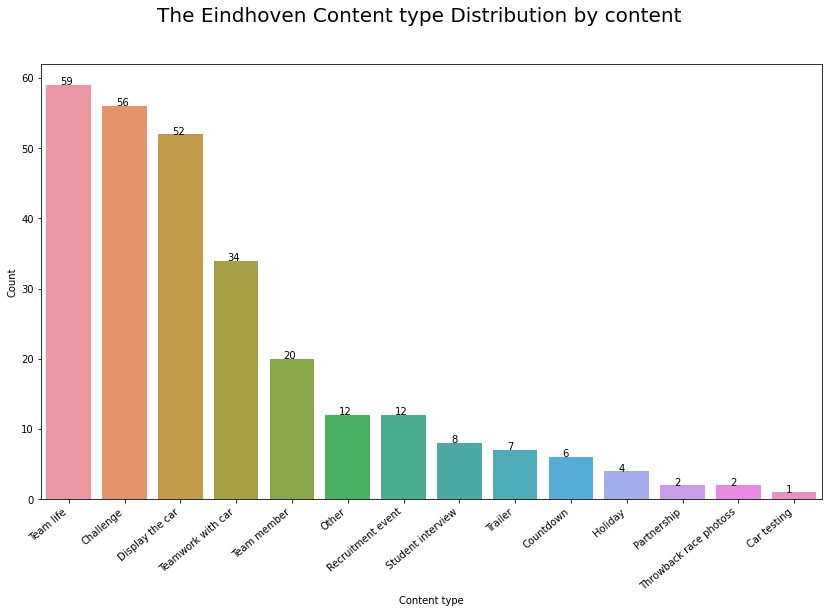

In [ ]:
data_hist = data.groupby('Content')['Content'].count().sort_values(ascending=False)

plt.figure(figsize=(14,8))
ax = sns.barplot(x = data_hist.index, y = data_hist, errwidth=0, ci=None)
#ax = sns.countplot(y=data["Content"],data=data)
for bar_value in ax.patches:
  ax.annotate('{:.0f}'.format(bar_value.get_height()), (bar_value.get_x()+0.25, bar_value.get_height()+0.01))
  #ax.annotate('{:.0f}'.format(bar_value.get_width()), (bar_value.get_x()+0.25, bar_value.get_width()+0.01))

ax.set_xticklabels(ax.get_xticklabels(),fontsize=10, rotation=40, ha="right")
plt.suptitle('The Eindhoven Content type Distribution by content', fontsize=20)
plt.xlabel('Content type')
plt.ylabel('Count') ;

In [ ]:
# scatter
data_scatter = data
data_scatter['date'] = pd.to_datetime(data["Post time"])
data_scatter.drop(["Post time"], axis=1, inplace=True)
data_scatter["Month"] = pd.to_datetime(data_scatter['date'], format='%b-%y').dt.to_period('M')

Text(0.5, 1.0, 'The Eindhoven content distribution on Instagram from 2019 to 2022')

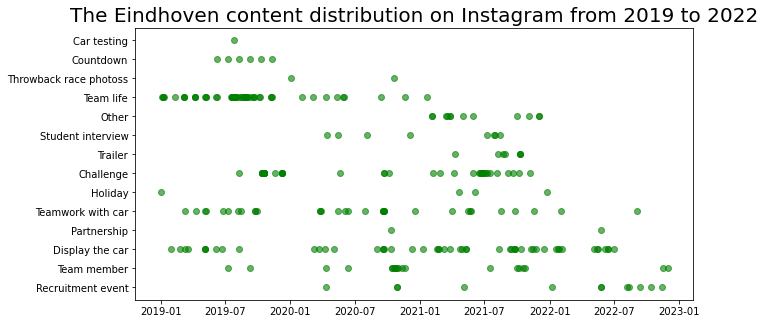

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(data_scatter["date"], y=data_scatter['Content'], 
                   alpha=0.6,
                   facecolor='green',
                   edgecolor='face')
ax.set_title('The Eindhoven content distribution on Instagram from 2019 to 2022', fontsize=20)

In [ ]:
data_scatter_2019 = data[data["date"] <= "2020-01-01"]

Text(0.5, 1.0, 'The Eindhoven content distribution on Instagram in 2019')

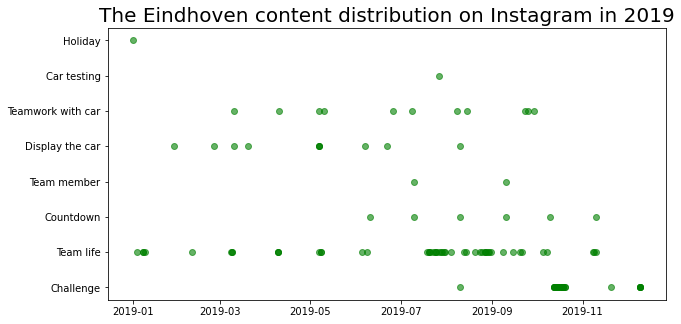

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(data_scatter_2019["date"], y=data_scatter_2019['Content'], 
                   alpha=0.6,
                   facecolor='green',
                   edgecolor='face')
ax.set_title('The Eindhoven content distribution on Instagram in 2019', fontsize=20)

In [ ]:
def displot_data(data,parameter):
  sns.displot(data,x = parameter[0], col = parameter[1], # hue = parameter[1],col = parameter[2], 
            #kind = 'kde',
            multiple="stack", 
            palette = 'Set1')#, 
            #alpha = 0.1)

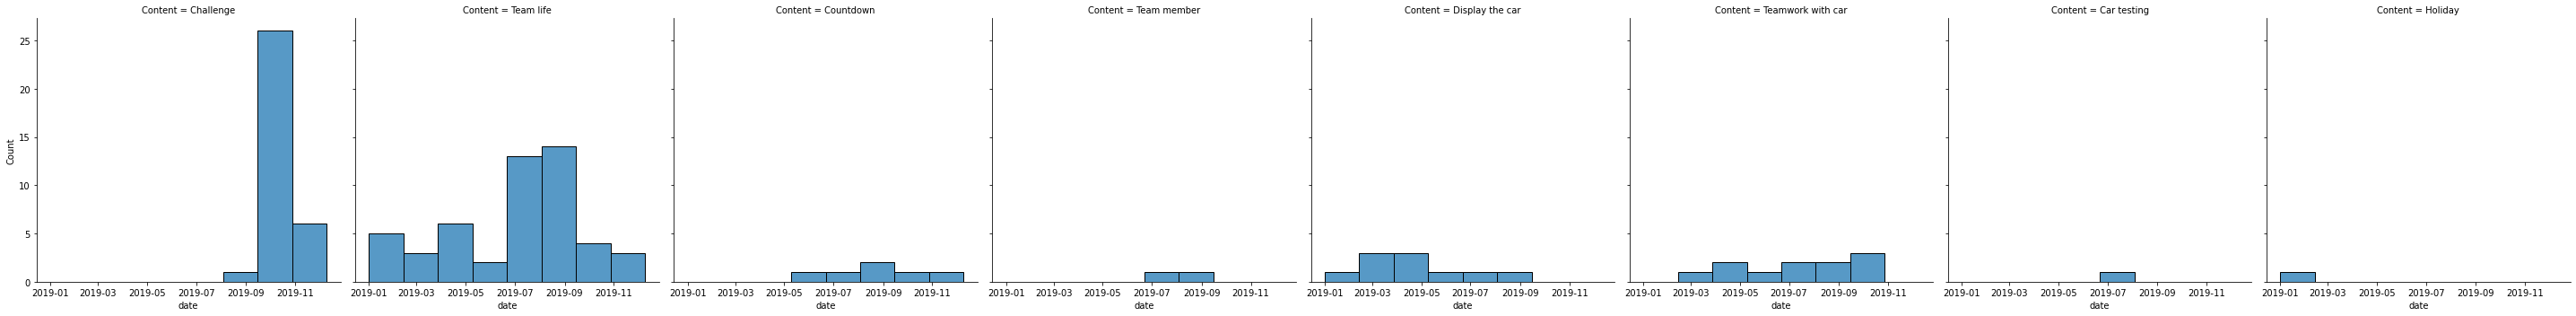

In [ ]:
displot_data(data_scatter_2019,['date', 'Content'])

In [ ]:
data_freq_weekly = data[data["date"] <= "2020-01-01"].sort_values("date")
data_freq_weekly.index = data_freq_weekly['date']

In [ ]:
from datetime import date, datetime

In [ ]:
# Define week (break comment time (created_at) into columns (dayOfWeek))
def dayOfWeek(string):
  days = pd.datetime.strptime(str(string), '%Y-%m-%d %H:%M:%S').weekday()
  if days == 0:
    return 'Mon'
  elif days == 1:
        return 'Tue'
  elif days == 2:
        return 'Wed'
  elif days == 3:
        return 'Thu'
  elif days == 4:
        return 'Fri'
  elif days == 5:
        return 'Sat'
  else:
        return 'Sun'  

# Convert date to week and store in dayOfWeek column
data_freq_weekly['dayOfWeek'] = data_freq_weekly['date'].apply(lambda time: dayOfWeek(time))


<ipython-input-98-67eec8bb28fc>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = pd.datetime.strptime(str(string), '%Y-%m-%d %H:%M:%S').weekday()


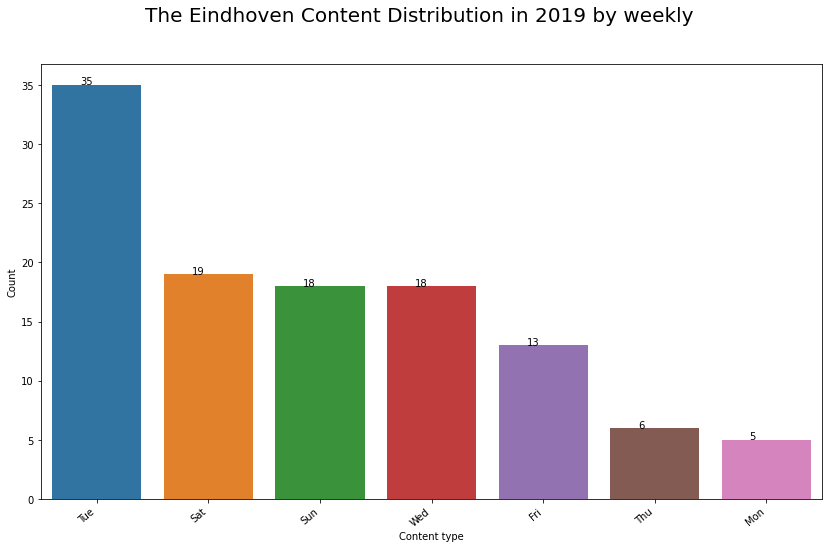

In [ ]:
data_freq_weekly_result = data_freq_weekly.groupby('dayOfWeek')['Content'].count().sort_values(ascending=False)

plt.figure(figsize=(14,8))
ax = sns.barplot(x = data_freq_weekly_result.index, y = data_freq_weekly_result, errwidth=0, ci=None)
#ax = sns.countplot(y=data["Content"],data=data)
for bar_value in ax.patches:
  ax.annotate('{:.0f}'.format(bar_value.get_height()), (bar_value.get_x()+0.25, bar_value.get_height()+0.01))
  #ax.annotate('{:.0f}'.format(bar_value.get_width()), (bar_value.get_x()+0.25, bar_value.get_width()+0.01))

ax.set_xticklabels(ax.get_xticklabels(),fontsize=10, rotation=40, ha="right")
plt.suptitle('The Eindhoven Content Distribution in 2019 by weekly', fontsize=20)
plt.xlabel('Content type')
plt.ylabel('Count') ;

In [ ]:
data_freq_weekly_2020 = data[(data["date"] >= "2020-01-01") & (data['date'] <='2021-12-31')].sort_values("date")
data_freq_weekly_2020.index = data_freq_weekly_2020['date']

In [ ]:
# Convert date to week and store in dayOfWeek column
data_freq_weekly_2020['dayOfWeek'] = data_freq_weekly_2020['date'].apply(lambda time: dayOfWeek(time))
data_freq_weekly_2020

<ipython-input-98-67eec8bb28fc>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = pd.datetime.strptime(str(string), '%Y-%m-%d %H:%M:%S').weekday()


,Content,date,Month,dayOfWeek
date,,,,
2020-01-02,Throwback race photoss,2020-01-02,2020-01,Thu
2020-02-04,Team life,2020-02-04,2020-02,Tue
2020-03-06,Team life,2020-03-06,2020-03,Fri
2020-03-09,Display the car,2020-03-09,2020-03,Mon
2020-03-22,Display the car,2020-03-22,2020-03,Sun
...,...,...,...,...
2021-11-22,Display the car,2021-11-22,2021-11,Mon
2021-12-02,Other,2021-12-02,2021-12,Thu
2021-12-03,Other,2021-12-03,2021-12,Fri


Text(0, 0.5, 'Count')

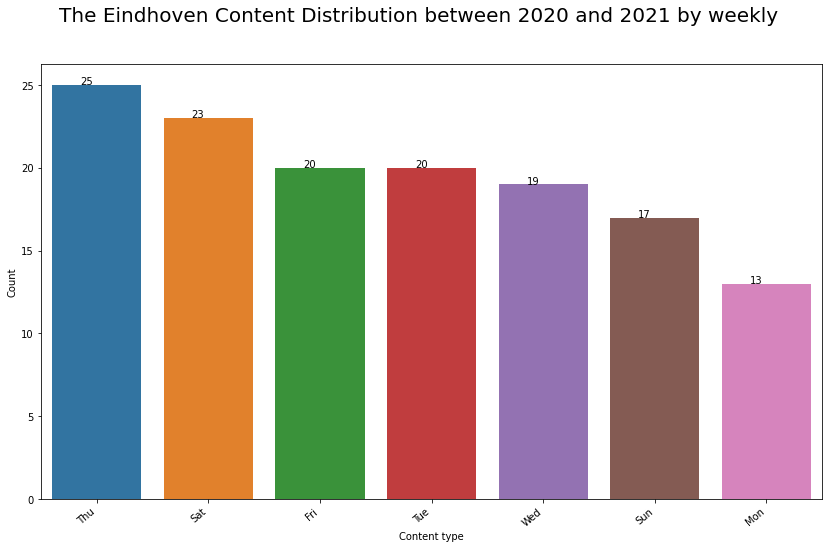

In [ ]:
data_freq_weekly_2020_result = data_freq_weekly_2020.groupby('dayOfWeek')['Content'].count().sort_values(ascending=False)

plt.figure(figsize=(14,8))
ax = sns.barplot(x = data_freq_weekly_2020_result.index, y = data_freq_weekly_2020_result, errwidth=0, ci=None)
#ax = sns.countplot(y=data["Content"],data=data)
for bar_value in ax.patches:
  ax.annotate('{:.0f}'.format(bar_value.get_height()), (bar_value.get_x()+0.25, bar_value.get_height()+0.01))
  #ax.annotate('{:.0f}'.format(bar_value.get_width()), (bar_value.get_x()+0.25, bar_value.get_width()+0.01))

ax.set_xticklabels(ax.get_xticklabels(),fontsize=10, rotation=40, ha="right")
plt.suptitle('The Eindhoven Content Distribution between 2020 and 2021 by weekly', fontsize=20)
plt.xlabel('Content type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

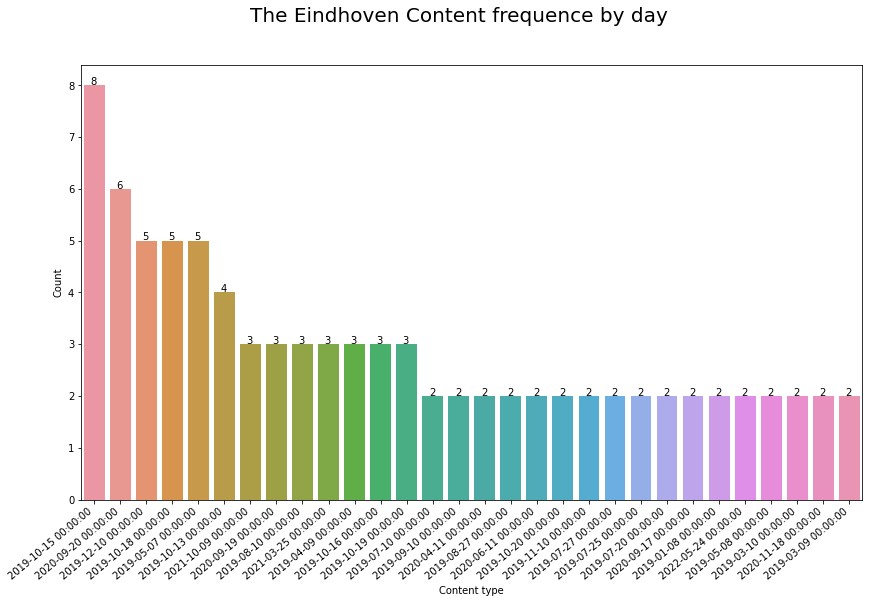

In [ ]:
data_freq_dayly = data.groupby('date')['Content'].count().sort_values(ascending=False).head(30)

plt.figure(figsize=(14,8))
ax = sns.barplot(x = data_freq_dayly.index, y = data_freq_dayly, errwidth=0, ci=None)
#ax = sns.countplot(y=data["Content"],data=data)
for bar_value in ax.patches:
  ax.annotate('{:.0f}'.format(bar_value.get_height()), (bar_value.get_x()+0.25, bar_value.get_height()+0.01))
  #ax.annotate('{:.0f}'.format(bar_value.get_width()), (bar_value.get_x()+0.25, bar_value.get_width()+0.01))

ax.set_xticklabels(ax.get_xticklabels(),fontsize=10, rotation=40, ha="right")
plt.suptitle('The Eindhoven Content frequence by day', fontsize=20)
plt.xlabel('Content type')
plt.ylabel('Count')

# The Sunwsift Content type and frequency analysis

In [ ]:
import pandas as pd
data = pd.read_csv("sunwsift.csv", header=None, usecols=[0,1], names=['Content','Post time'])
data.head()

,Content,Post time
0,Content,Post time
1,Display the car,3/12/2022
2,Display the car,2/12/2022
3,Display the car,2/12/2022
4,Teamwork with car,25/11/2022


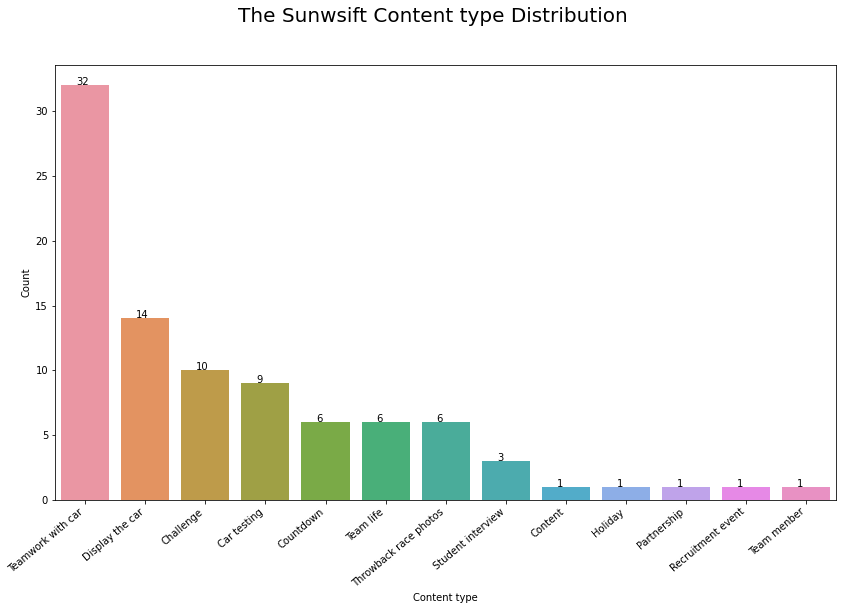

In [ ]:
data_hist = data.groupby('Content')['Content'].count().sort_values(ascending=False)

plt.figure(figsize=(14,8))
ax = sns.barplot(x = data_hist.index, y = data_hist, errwidth=0, ci=None)
#ax = sns.countplot(y=data["Content"],data=data)
for bar_value in ax.patches:
  ax.annotate('{:.0f}'.format(bar_value.get_height()), (bar_value.get_x()+0.25, bar_value.get_height()+0.01))
  #ax.annotate('{:.0f}'.format(bar_value.get_width()), (bar_value.get_x()+0.25, bar_value.get_width()+0.01))

ax.set_xticklabels(ax.get_xticklabels(),fontsize=10, rotation=40, ha="right")
plt.suptitle('The Sunwsift Content type Distribution', fontsize=20)
plt.xlabel('Content type')
plt.ylabel('Count') ;

In [ ]:
# scatter
data_scatter = data
data_scatter['date'] = pd.to_datetime(data["Post time"],dayfirst=True, errors='coerce')
data_scatter.drop(["Post time"], axis=1, inplace=True)
data_scatter["Month"] = pd.to_datetime(data_scatter['date'], format='%b-%y').dt.to_period('M')

Text(0.5, 1.0, 'The Sunwsift content distribution on Instagram from 2019 to 2022')

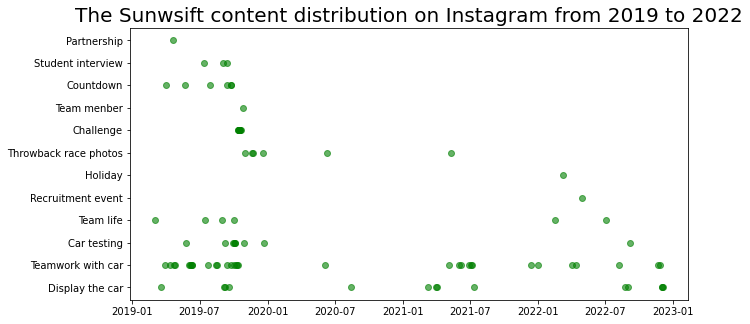

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(data_scatter["date"], y=data_scatter['Content'], 
                   alpha=0.6,
                   facecolor='green',
                   edgecolor='face')
ax.set_title('The Sunwsift content distribution on Instagram from 2019 to 2022', fontsize=20)

In [ ]:
data_scatter_2019 = data[data["date"] <= "2020-01-01"]

Text(0.5, 1.0, 'The Sunwsift content distribution on Instagram in 2019')

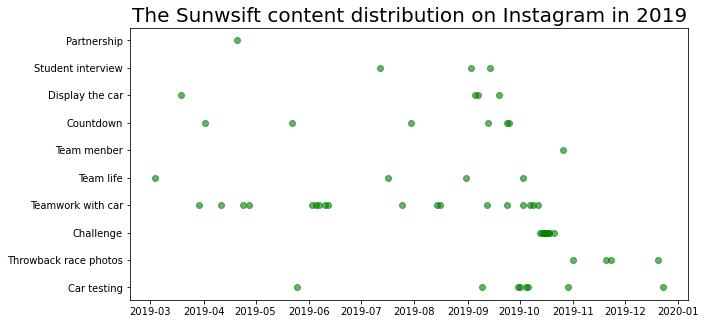

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(data_scatter_2019["date"], y=data_scatter_2019['Content'], 
                   alpha=0.6,
                   facecolor='green',
                   edgecolor='face')
ax.set_title('The Sunwsift content distribution on Instagram in 2019', fontsize=20)

# backup for code

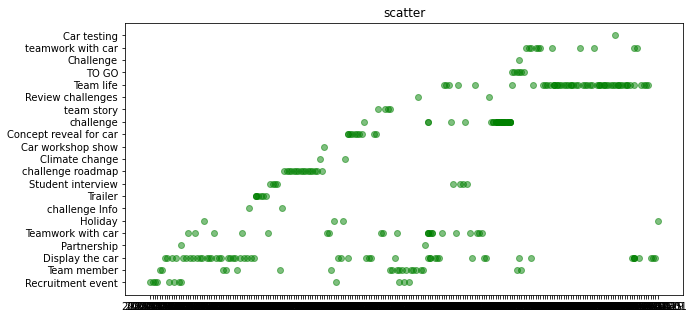

In [ ]:

#data_heatmap.index = data_heatmap['date']
#data_heatmap.sort_index(inplace=True)
data_scatter['date'] = pd.to_datetime(data["Post time"])
data_scatter.drop(["Post time"], axis=1, inplace=True)


fig, ax = plt.subplots(figsize=(10,5))


ax.scatter(data["Post time"], y=data['Content'], 
                   alpha=0.5,
                   facecolor='green',
                   edgecolor='face')
ax.set_title('scatter')
ax

In [ ]:
data_heatmap.pivot_table(index="Content", columns='Month', aggfunc='count').fillna(0)

In [ ]:
data_heatmap_count = data_heatmap.pivot_table(index="Month", columns='Content', aggfunc='count').fillna(0)

In [ ]:
#sns.heatmap(data_heatmap_count, linewidths=.25)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data_heatmap_count, vmax=.8, square=True,cbar=True, annot=True, annot_kws={'size': 10})


In [ ]:
data_heatmap_count

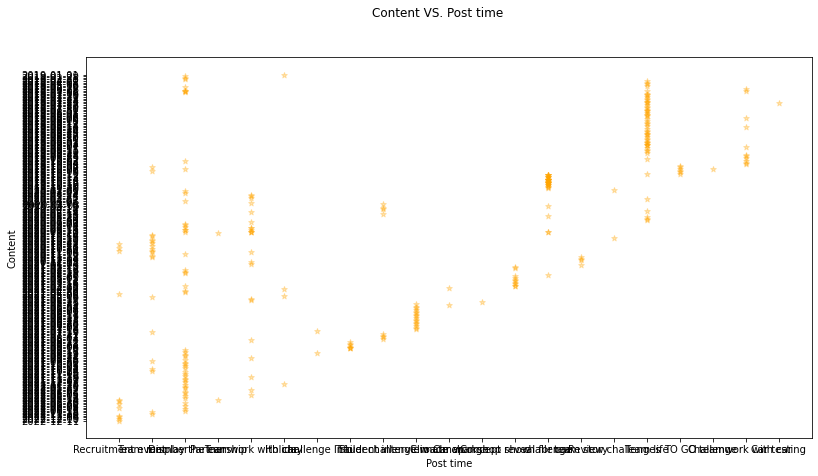

In [ ]:
plt.figure(figsize=(13, 7)) 
plt.scatter(data['Content'],data['Post time'], color ='orange', marker='*', alpha=0.3)
plt.suptitle('Content VS. Post time')
plt.xlabel('Post time')
plt.ylabel('Content') ;